# Colored Geometric Brownian Motion

Multivariate, colored Geometric Brownian motion $X(t)$ is the solution to the multiplicative noise stochastic differential equations

$$dX = \mu X dt + \sigma Z X dt $$

and
$$\tau d Z = - Z+dW.$$

One can solve this SDE to get

$$X(t)=X(0)\exp\left[\mu t +\sigma \int_0^t ds Z(s)\right].$$

### In the limit $\tau\rightarrow 0$ 

this does not yield the expected geometric Brownian Motion system, but


$$X(t)=X(0)\exp\left[\mu t +\sigma  W(t)\right]$$

where the noise induced drift term $-\sigma^2/2$ **in the solution** is missing. When we now write down an Ito-SDE for this solution we get:

$$dX = (\mu+\sigma^2/2) X dt + \sigma X dW $$

For the multivariate process, see all the options that are avaiable for `wiener()`and `ornstein_uhlenbeck()` work as well, see the corresponding notebooks in the `examples/` directory.


In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## Comparison of Colored GMB with different timescales and ordinary GMB


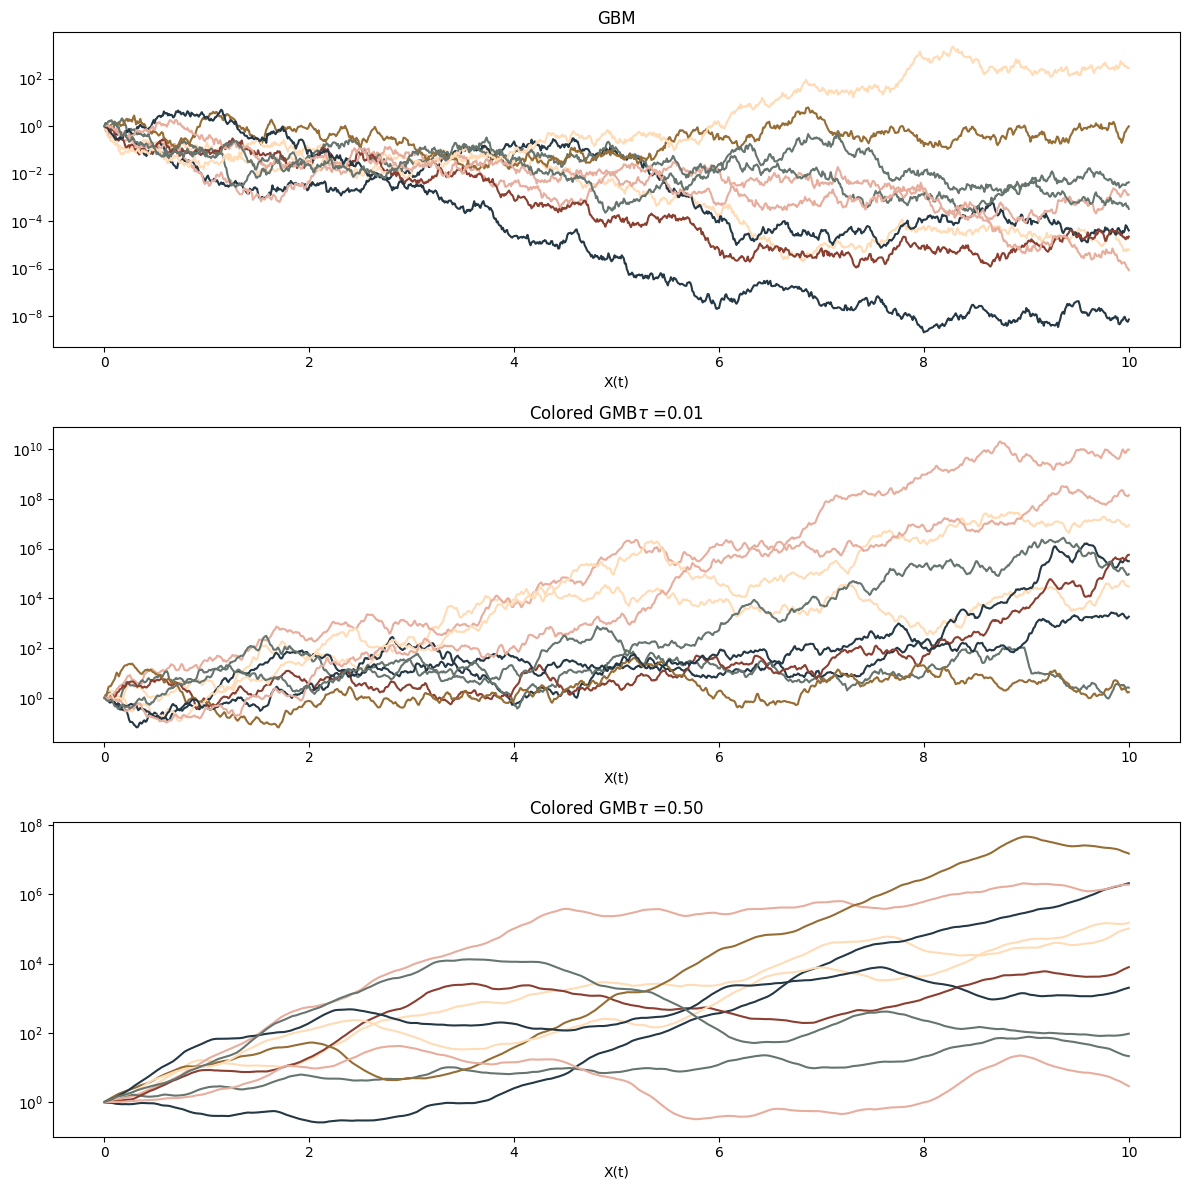

In [2]:
T = 10
dt = 0.001
gap = 10
samples = 10
mu=1
sigma=2
tau1 = 0.01
tau2 = 0.5
res=[]
tt=["GBM","Colored GMB"+r"$\tau$ ="+f'{tau1:.2f}',"Colored GMB"+r"$\tau$ ="+f'{tau2:.2f}']
res.append(p.geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma))
res.append(p.colored_geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma,tau=tau1))
res.append(p.colored_geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma,tau=tau2))

fig,ax = plt.subplots(len(res),1,figsize=[12,12])
for i in range(len(res)):
    t = res[i]["t"]
    X = res[i]["X"]
    for j,x in enumerate(X):
        ax[i].plot(t,x)
    ax[i].set_xlabel("t")
    ax[i].set_xlabel("X(t)")
    ax[i].set_yscale("log")
    ax[i].set_title(tt[i])
fig.tight_layout()
plt.show()